## Write at least three observations or inferences that can be made from the data. ####

In [2]:
# From Starter file

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "Resources/Mouse_metadata.csv"
study_results = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
merge_data = mouse_metadata.merge(study_results, on="Mouse ID")
merge_data.head(11)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen
merge_mean = merge_data.groupby('Drug Regimen').mean()
merge_mean['Tumor Volume (mm3)']
merge_median = merge_data.groupby('Drug Regimen').median()
merge_median['Tumor Volume (mm3)']
merge_variance = merge_data.groupby('Drug Regimen').var()
merge_variance['Tumor Volume (mm3)']
merge_stdev = merge_data.groupby('Drug Regimen').std()
merge_stdev['Tumor Volume (mm3)']
merge_sem = merge_data.groupby('Drug Regimen').sem()
merge_sem['Tumor Volume (mm3)']

summary_stats = pd.DataFrame(merge_mean['Tumor Volume (mm3)'])
summary_stats = summary_stats.join(merge_median['Tumor Volume (mm3)'], lsuffix = " Mean", rsuffix=" Median")
summary_stats = summary_stats.join(merge_variance['Tumor Volume (mm3)'], rsuffix = " Variance")
summary_stats = summary_stats.join(merge_stdev['Tumor Volume (mm3)'], rsuffix = " Standard Deviation")
summary_stats = summary_stats.join(merge_sem['Tumor Volume (mm3)'], rsuffix = " SEM")
summary_stats

,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3),Tumor Volume (mm3) Standard Deviation,Tumor Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


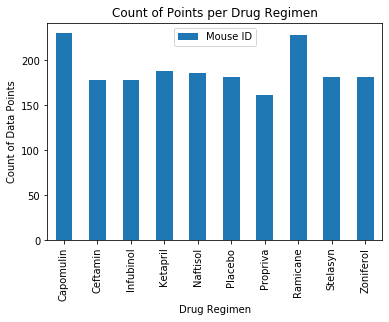

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
merge_count = merge_data.groupby('Drug Regimen').count()
merge_df = pd.DataFrame(merge_count['Mouse ID'])
ax = merge_df.plot(kind='bar', title='Count of Points per Drug Regimen')
ax.set_ylabel("Count of Data Points")
ax

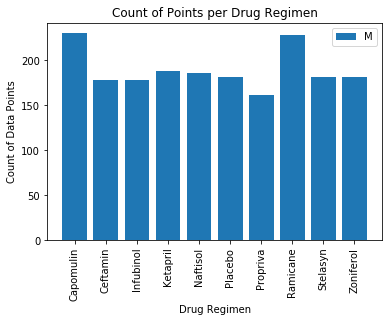

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
plt.bar(x_axis, merge_count['Mouse ID'])
plt.xticks(rotation=90)
plt.title("Count of Points per Drug Regimen")
plt.legend("Mouse ID")
plt.ylabel("Count of Data Points")
plt.xlabel("Drug Regimen")
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024845041108>],
      dtype=object)

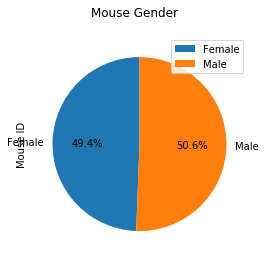

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = merge_data.groupby('Sex').count()
gender_df = pd.DataFrame(gender_count['Mouse ID'])
piex = gender_df.plot(kind='pie', title='Mouse Gender', subplots=True, startangle=90, autopct='%1.1f%%')
piex

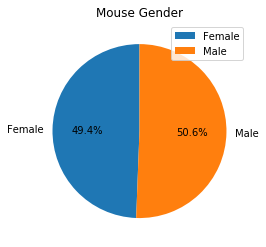

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
label = ['Female', 'Male']
pypie = plt.pie(gender_df['Mouse ID'], labels = label, startangle=90, autopct='%1.1f%%')
plt.title("Mouse Gender")
plt.legend()
plt.show()

In [29]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
initial_volume = merge_data.loc[merge_data['Timepoint'] == 0]
final_volume = merge_data.loc[merge_data['Timepoint'] >= merge_data['Timepoint'].shift(-1)]

initial_volume['Tumor Volume (mm3)'].unique() #make sure all the initial volumes are the same

group_final = final_volume.groupby('Drug Regimen').mean()
final_df = pd.DataFrame(group_final['Tumor Volume (mm3)']).sort_values('Tumor Volume (mm3)')
final_df

final_rami = final_volume.loc[final_volume['Drug Regimen'] == 'Ramicane'] 
final_capo = final_volume.loc[final_volume['Drug Regimen'] =='Capomulin']
final_ceft = final_volume.loc[final_volume['Drug Regimen'] =='Ceftamin']
final_infu = final_volume.loc[final_volume['Drug Regimen'] == 'Infubinol']
final_top = final_rami.merge(final_capo, how="outer")
final_top = final_top.merge(final_ceft, how="outer")
final_top = final_top.merge(final_infu, how="outer")

final_tumor = pd.DataFrame(final_top[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']])
final_tumor.head()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
rami_q25 = st.scoreatpercentile(final_rami['Tumor Volume (mm3)'], per=25)
rami_q75 = st.scoreatpercentile(final_rami['Tumor Volume (mm3)'], per=75)
rami_iqr = rami_q75 - rami_q25
rami_limits = rami_iqr * 1.5
rami_upper = rami_limits + rami_q75
rami_lower = rami_q25 - rami_limits

rami_outliers_list = final_rami.loc[final_rami['Tumor Volume (mm3)'] >= rami_upper]
rami_outliers_list = rami_outliers_list.merge(final_rami.loc[final_rami['Tumor Volume (mm3)'] <= rami_lower], how='outer')
print(rami_outliers_list)

capo_q25 = st.scoreatpercentile(final_capo['Tumor Volume (mm3)'], per=25)
capo_q75 = st.scoreatpercentile(final_capo['Tumor Volume (mm3)'], per=75)
capo_iqr = capo_q75 - capo_q25
capo_limits = capo_iqr * 1.5
capo_upper = capo_limits + capo_q75
capo_lower = capo_q25 - capo_limits

capo_outliers_list = final_capo.loc[final_capo['Tumor Volume (mm3)'] >= capo_upper]
capo_outliers_list = capo_outliers_list.merge(final_capo.loc[final_capo['Tumor Volume (mm3)'] <= capo_lower], how="outer")
print(capo_outliers_list)

ceft_q25 = st.scoreatpercentile(final_ceft['Tumor Volume (mm3)'], per=25)
ceft_q75 = st.scoreatpercentile(final_ceft['Tumor Volume (mm3)'], per=75)
ceft_iqr = ceft_q75 - ceft_q25
ceft_limits = ceft_iqr * 1.5
ceft_upper = ceft_limits + ceft_q75
ceft_lower = ceft_q25 - ceft_limits

ceft_outliers_list = final_ceft.loc[final_ceft['Tumor Volume (mm3)'] >= ceft_upper]
ceft_outliers_list = ceft_outliers_list.merge(final_ceft.loc[final_ceft['Tumor Volume (mm3)'] <= ceft_lower], how="outer")
print(ceft_outliers_list)

infu_q25 = st.scoreatpercentile(final_infu['Tumor Volume (mm3)'], per=25)
infu_q75 = st.scoreatpercentile(final_infu['Tumor Volume (mm3)'], per=75)
infu_iqr = infu_q75 - infu_q25
infu_limits = infu_iqr * 1.5
infu_upper = infu_limits + infu_q75
infu_lower = infu_q25 - infu_limits

infu_outliers_list = final_infu.loc[final_infu['Tumor Volume (mm3)'] >= infu_upper]
infu_outliers_list = infu_outliers_list.merge(final_infu.loc[final_infu['Tumor Volume (mm3)'] <= infu_lower], how="outer")
print(infu_outliers_list)

Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []
  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0     c326    Infubinol  Female          18          25          5   

   Tumor Volume (mm3)  Metastatic Sites  
0           36.321346                 0  


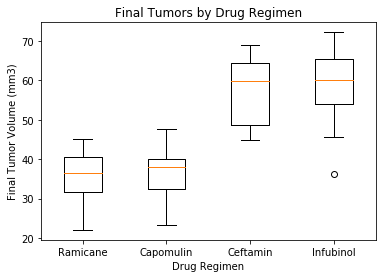

In [30]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [final_rami['Tumor Volume (mm3)'], final_capo['Tumor Volume (mm3)'], final_ceft['Tumor Volume (mm3)'], final_infu['Tumor Volume (mm3)']]
labels = ['Ramicane','Capomulin', 'Ceftamin', 'Infubinol']
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.title("Final Tumors by Drug Regimen")
plt.boxplot(data, labels=labels, showfliers=True)
plt.show()

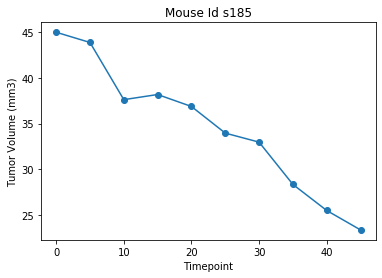

In [31]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
final_capo.head() #chose Mouse ID s185
s185_data = merge_data.loc[merge_data['Mouse ID'] == "s185"]
plt.plot(s185_data['Timepoint'], s185_data['Tumor Volume (mm3)'], marker = 'o')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Id s185')
plt.show()

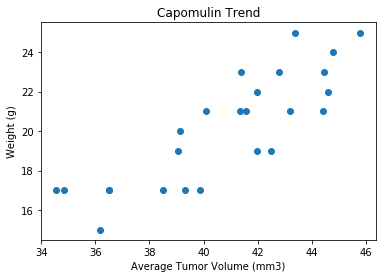

In [32]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
final_capo
all_capo = merge_data.loc[merge_data['Drug Regimen'] == "Capomulin"]
all_vol = pd.DataFrame(all_capo[['Mouse ID', 'Tumor Volume (mm3)']])
avg_vol = all_vol.groupby('Mouse ID').mean()
all_weight_df = pd.DataFrame(all_capo[['Mouse ID', 'Weight (g)']])
weight_df = all_weight_df.groupby('Mouse ID').mean()
capo_df = avg_vol.merge(weight_df, on="Mouse ID")
plt.scatter(capo_df['Tumor Volume (mm3)'], capo_df['Weight (g)'])
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.title("Capomulin Trend")
plt.show()

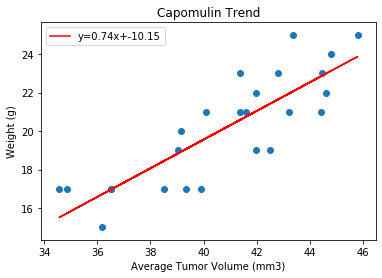

R value is 0.8419363424694718; P value is 1.3225722434712642e-07; Standard Error is 0.09924763572688564.


In [33]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume 
# for the Capomulin regimen
slope, intercept, r_value, p_value, std_err = st.linregress(capo_df['Tumor Volume (mm3)'], capo_df['Weight (g)'])

line = slope*(capo_df['Tumor Volume (mm3)'])+intercept
plt.plot(capo_df['Tumor Volume (mm3)'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.scatter(capo_df['Tumor Volume (mm3)'], capo_df['Weight (g)'])
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.title("Capomulin Trend")
plt.legend()
plt.show()
print(f'R value is {r_value}; P value is {p_value}; Standard Error is {std_err}.')